C:\Users\ghadf\AppData\Local\Temp\ipykernel_20096\121657161.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TS%'] = data['PTS'] / (2 * (data['FGA'] + 0.44 * data['FTA']))
C:\Users\ghadf\AppData\Local\Temp\ipykernel_20096\121657161.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['PER'] = (data['PTS'] + data['REB'] + data['AST'] + data['STL'] + data['BLK'] -
C:\Users\ghadf\AppData\Local\Temp\ipykernel_20096\121657161.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of

      SEASON_ID     TEAM_ID TEAM_ABBREVIATION           TEAM_NAME     GAME_ID  \
29997     12018  1610612749               MIL     Milwaukee Bucks  0011800056   
29998     12018  1610612743               DEN      Denver Nuggets  0011800057   
29999     12018  1610612746               LAC         LA Clippers  0011800057   
29981     12018  1610612765               DET     Detroit Pistons  0011800058   
29988     12018  1610612764               WAS  Washington Wizards  0011800058   
...         ...         ...               ...                 ...         ...   
897       42022  1610612748               MIA          Miami Heat  0042200403   
858       42022  1610612743               DEN      Denver Nuggets  0042200404   
872       42022  1610612748               MIA          Miami Heat  0042200404   
844       42022  1610612743               DEN      Denver Nuggets  0042200405   
845       42022  1610612748               MIA          Miami Heat  0042200405   

       GAME_DATE      MATCH

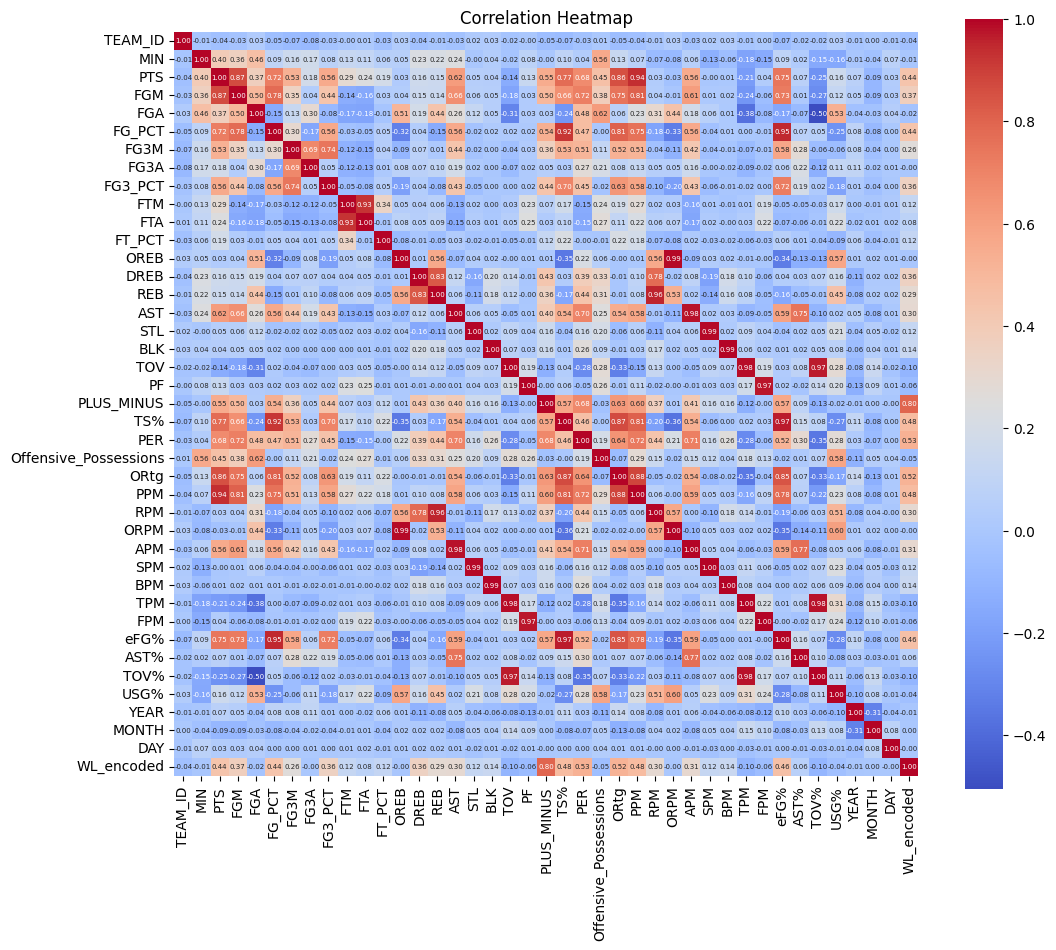

In [36]:
#todos: normalize the stats, add in the teams from 1979 on that are missing from the data,
#change just the non percentage continuous variables in the X dataset
#previous year was released on 8/17, see if in new season data are there then
#look into XGBoost for the gradient boosting regressor

from nba_api.stats.static import teams 
from nba_api.stats.endpoints import leaguegamefinder 
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

teams = teams.get_teams()
#print(teams)

# Set the option to display all columns
pd.set_option('display.max_columns', None)

all_games = leaguegamefinder.LeagueGameFinder().get_data_frames()[0]

# List of current NBA team IDs
current_teams = [1610612737, 1610612738, 1610612740, 1610612741, 1610612742, 1610612743, 1610612744, 1610612745, 1610612746, 1610612747, 1610612748, 1610612749, 1610612750, 1610612751, 1610612752, 1610612753, 1610612754, 1610612755, 1610612756, 1610612757, 1610612758, 1610612759, 1610612760, 1610612761, 1610612762, 1610612763, 1610612764, 1610612765, 1610612766]
#print(current_teams)

# Filter the data to include only current NBA teams
data = all_games[all_games['TEAM_ID'].isin(current_teams)]
#print('base_data = ',data.columns)
#print(data.head())
#stat addons list: PER, TS%, eFG%, 3PAr, FTr, ORB%, DRB%, TRB%, AST%, STL%, BLK%, TOV%, USG%, OWS, DWS, WS, WS/48, OBPM, DBPM, BPM, VORP
#adding TS%= PTS / (2 * (FGA + 0.44 * FTA))
data['TS%'] = data['PTS'] / (2 * (data['FGA'] + 0.44 * data['FTA']))

#adding PER% = (PTS + REB + AST + STL + BLK - FGM - FTM - TOV) / MIN
data['PER'] = (data['PTS'] + data['REB'] + data['AST'] + data['STL'] + data['BLK'] -
             data['FGM'] - data['FTM'] - data['TOV'])/ data['MIN']


#**OFF Rating add
# Calculate offensive and defensive possessions
data['Offensive_Possessions'] = data['FGA'] + 0.44 * data['FTA'] + data['TOV'] - data['OREB']
#data['Defensive_Possessions'] = data['Opponent_FGA'] + 0.44 * data['Opponent_FTA'] + data['Opponent_TOV'] - data['Opponent_OREB']

# Calculate Offensive Rating and Defensive Rating
data['ORtg'] = (data['PTS'] / data['Offensive_Possessions']) * 100
#data['DRtg'] = (data['Points_Allowed'] / data['Defensive_Possessions']) * 100

#add points per minute  
data['PPM'] = data['PTS'] / data['MIN']

#adding rebounds per minute
data['RPM'] = data['REB'] / data['MIN']

#adding rebounds per minute
data['ORPM'] = data['OREB'] / data['MIN']

#adding assists per minute
data['APM'] = data['AST'] / data['MIN']

#adding steals per minute
data['SPM'] = data['STL'] / data['MIN']

#adding blocks per minute
data['BPM'] = data['BLK'] / data['MIN']

#adding turnovers per minute
data['TPM'] = data['TOV'] / data['MIN']

#adding fouls per minute
data['FPM'] = data['PF'] / data['MIN']

#adding eFG%
data['eFG%'] = (data['FGM'] + 0.5 * data['FG3M']) / data['FGA']

#adding AST%
data['AST%'] = data['AST'] / data['FGM']

#adding TOV%
data['TOV%'] = data['TOV'] / (data['FGA'] + 0.44 * data['FTA'] + data['TOV'])

#adding USG%
data['USG%'] = (data['FGA'] + 0.44 * data['FTA'] + data['TOV']) / data['MIN']

#adding OWS
#adding DWS
#adding WS
3#adding WS/48
#adding OBPM
#adding DBPM
#adding BPM
#adding VORP
#adding O/D Rating
#adding O/D Win Shares
#adding O/D Win Shares
#adding O/D WS/48
#adding O/D BPM
#adding O/D BPM
#adding O/D VORP
#adding O/D VORP


#***PRE PROCESSING***
#*Date transformations
# Convert the date column to datetime format
data['GAME_DATE'] = pd.to_datetime(data['GAME_DATE'])

# Extract numerical features from the date column
data['YEAR'] = data['GAME_DATE'].dt.year
data['MONTH'] = data['GAME_DATE'].dt.month
data['DAY'] = data['GAME_DATE'].dt.day


#**Drop Missing values
# Drop rows with missing values
data_encoded = data.dropna()

# Filter the data to include only selected columns
#data_encoded_selected = data_encoded.iloc[:, :40]

# Check if the 2022-2023 NBA season is in the data. previous year was released on 8/17, see if in data then
#has_23_24_schedule = any(data_encoded_selected['SEASON_ID'] == 42023)
#print('has_23_24_schedule = ',has_23_24_schedule)


# Filter the data for the 2022-2023 NBA season - changing to 1979-2023
#could also use season_id = 42022
start_date = pd.to_datetime('1979-10-01')
end_date = pd.to_datetime('2023-06-30')
season_data = data_encoded[(data_encoded['GAME_DATE'] >= start_date) & (data_encoded['GAME_DATE'] <= end_date)].copy()

#sort season_data by game_id and game_date
#proof that the dataset is team stats per game and not combined team stats per game
season_data = season_data.sort_values(by=['GAME_DATE','GAME_ID'])


# Encode 'WL' column as 1 for 'W' (win) and 0 for 'L' (loss)
season_data['WL_encoded'] = season_data['WL'].apply(lambda x: 1 if x == 'W' else 0)
print(season_data)


# Reorder the columns in the DataFrame to place 'WL_encoded' at the end
season_data = season_data[[col for col in season_data.columns if col != 'WL_encoded'] + ['WL_encoded']]

# Create a correlation matrix for the selected columns
correlation_matrix = season_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True,
            annot_kws={'size': 5})  # Adjust the font size (here it's set to 8)


plt.title('Correlation Heatmap')
plt.show()

#In this code, we reorder the columns of season_data so that the target variable 'WL_encoded' is at the end. 
# Then, we calculate the correlation matrix using season_data.corr() and plot the heatmap using sns.heatmap(). 
# The heatmap will show the correlation values between different variables, with positive correlations in warmer colors and negative 
# correlations in cooler colors. The annot=True parameter shows the actual correlation values on the heatmap, and fmt='.2f' formats 
# the numbers to two decimal places. The cmap='coolwarm' parameter sets the color scheme for the heatmap.


In [37]:
#PRE_PROCESSING STEP

# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define the columns for the dependent (y) and independent (X) variables
y_column = 'WL_encoded'
x_excluded_independent_variables = ['GAME_DATE','TEAM_ABBREVIATION','WL','FGA','TOV','TOV%', 'TEAM_NAME','MATCHUP','GAME_ID',
                                    'USG%','FG3A','OREB','PF','MIN','PTS','FGM','FG3M','FTM','FTA','PTS','REB','AST','PF','STL','BLK','DREB']

# Combine y_column with x_excluded_independent_variables
columns_to_drop = [y_column] + x_excluded_independent_variables

# Separate features and target
X = season_data.drop(columns=columns_to_drop, axis=1)  # drop the dependent variable and other columns that won't be used as features
y = season_data['WL_encoded']  # Selects target_column as the target variable

#Check the data types of the features in X
#X_dtypes = X.dtypes
#print(X_dtypes)


# Handle missing values
# Get numerical and categorical features based on their data types
numerical_features = [column for column in X.columns if X[column].dtype != 'object']
categorical_features = [column for column in X.columns if X[column].dtype == 'object']

# Define numerical transformer
# A pipeline that first fills missing numerical values with the mean, then scales them to have mean=0 and variance=1
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fills missing numerical values with the mean
    ('scaler', StandardScaler())                 # Scales numerical features
])

# Define categorical transformer
# A pipeline that first fills missing categorical values with the most frequent category, then one-hot encodes them
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fills missing categorical values with the most frequent category
    ('onehot', OneHotEncoder(handle_unknown='ignore'))    # One-hot encodes categorical features
])

# Combine numerical and categorical transformers
# Applies the numerical and categorical transformations defined above to the corresponding columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])
print(X.head())
# Split data
# Splits the data into training (80%) and testing (20%) sets, with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing on training data
# Fits and transforms the training data using the preprocessor defined above
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Apply preprocessing on testing data
# Transforms the testing data using the same preprocessor (without fitting, to prevent data leakage)
X_test_preprocessed = preprocessor.transform(X_test)

for column in categorical_features:
    print(f"{column}: {X[column].nunique()} unique values")

# Confirm the shape of X and y after handling missing values and encoding
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

print("Shape of X_train_preprocessed:", X_train_preprocessed.shape)
print("Shape of y:", y_train.shape)


# Get the transformed feature names after preprocessing
# This extracts the names of the features after transformation from the ColumnTransformer
#feature_names_after_preprocessing = preprocessor.get_feature_names(input_features=X.columns)

# Print column names after preprocessing
#print("Column names after preprocessing:")
#print(feature_names_after_preprocessing)

      SEASON_ID     TEAM_ID  FG_PCT  FG3_PCT  FT_PCT  PLUS_MINUS       TS%  \
29997     12018  1610612749   0.426    0.406   0.733        -4.0  0.536381   
29998     12018  1610612743   0.411    0.321   0.741        -6.0  0.505497   
29999     12018  1610612746   0.432    0.345   0.680         6.0  0.514151   
29981     12018  1610612765   0.356    0.267   0.793        -5.0  0.486167   
29988     12018  1610612764   0.470    0.313   0.737         5.0  0.558231   

            PER  Offensive_Possessions        ORtg       PPM       RPM  \
29997  0.441065                 120.20   95.673877  0.437262  0.182510   
29998  0.508333                 104.88   98.207475  0.429167  0.208333   
29999  0.562500                 104.00  104.807692  0.454167  0.233333   
29981  0.414226                 102.76   94.394706  0.405858  0.200837   
29988  0.489627                  99.36  102.657005  0.423237  0.178423   

           ORPM       APM       SPM       BPM       TPM       FPM      eFG%  \
29997  

In [38]:
#print(y_preds)
#print(y_test)
#Visualizing the predictions vs actual:
def plot_predictions(train_data=X_train_preprocessed,
                     train_labels=y_train,
                     test_data=X_test_preprocessed,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")

  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  # Show the legend
  plt.legend(prop={"size": 14});

#plot_predictions();

In [39]:
#Steps for basic neural network
#    Convert preprocessed data into PyTorch tensors
#    Define a simple feedforward neural network architecture
#    Specify the loss function and optimization algorithm
#    Train the model
#    Evaluate the model
import torch
from torch.utils.data import DataLoader, TensorDataset

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train_preprocessed, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).unsqueeze(1)  # Adding an extra dimension
X_test_tensor = torch.tensor(X_test_preprocessed, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).unsqueeze(1)

# Create a DataLoader for training and testing data
batch_size = 64
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)

test_data = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)


In [40]:
# Define a simple neural network
input_dim = X_train_tensor.shape[1]
output_dim = 1
hidden_dim = 64  # Example hidden dimension

class SimpleNN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(SimpleNN, self).__init__()
        self.fc1 = torch.nn.Linear(input_dim, hidden_dim)
        self.fc2 = torch.nn.Linear(hidden_dim, output_dim)
        self.sigmoid = torch.nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        return x
    

model = SimpleNN(input_dim, hidden_dim, output_dim)

In [41]:

# Loss and optimizer
loss_fn = torch.nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adjust the learning rate as needed



In [42]:
# Train the model
num_epochs = 10  # adjust as needed
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = loss_fn(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")


Epoch [1/10], Loss: 0.2518
Epoch [2/10], Loss: 0.1616
Epoch [3/10], Loss: 0.0629
Epoch [4/10], Loss: 0.1109
Epoch [5/10], Loss: 0.0257
Epoch [6/10], Loss: 0.0288
Epoch [7/10], Loss: 0.0167
Epoch [8/10], Loss: 0.0197
Epoch [9/10], Loss: 0.0079
Epoch [10/10], Loss: 0.0284


In [43]:
# Evaluate the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        predicted = (outputs.data > 0.5).float()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print(f'Accuracy: {100 * correct / total:.2f}%')



Accuracy: 99.43%


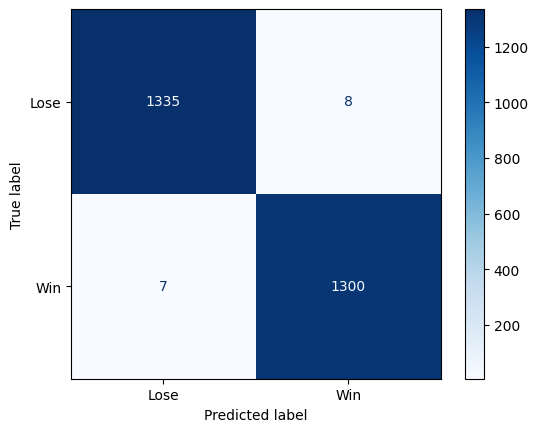

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test data
y_pred = model(X_test_tensor)
y_pred_labels = (y_pred > 0.5).float()  # Convert probabilities to class labels

# Calculate confusion matrix
cm = confusion_matrix(y_test_tensor.numpy(), y_pred_labels.numpy())

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Lose', 'Win'])
disp.plot(cmap=plt.cm.Blues)
plt.show()
#The confusion matrix will give you a visual representation of True Positives, True Negatives, False Positives, and False Negatives, 
# which can help you better understand where the model might be making mistakes.


In [46]:
print(train_data.tensors[0].shape)  # shape of the data tensor
print(train_data.tensors[1].shape)  # shape of the label tensor


torch.Size([10598, 41])
torch.Size([10598, 1])


In [ ]:
# 1. Set the model in evaluation mode
model.eval()

#Predictions in inference_mode()
with torch.inference_mode():
  y_preds = model(X_test_tensor)


plot_predictions(predictions=y_preds)

In [49]:
print(X.shape)
print(X_train.columns)
print(X_test.columns)


(13248, 23)
Index(['SEASON_ID', 'TEAM_ID', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS',
       'TS%', 'PER', 'Offensive_Possessions', 'ORtg', 'PPM', 'RPM', 'ORPM',
       'APM', 'SPM', 'BPM', 'TPM', 'FPM', 'eFG%', 'AST%', 'YEAR', 'MONTH',
       'DAY'],
      dtype='object')
Index(['SEASON_ID', 'TEAM_ID', 'FG_PCT', 'FG3_PCT', 'FT_PCT', 'PLUS_MINUS',
       'TS%', 'PER', 'Offensive_Possessions', 'ORtg', 'PPM', 'RPM', 'ORPM',
       'APM', 'SPM', 'BPM', 'TPM', 'FPM', 'eFG%', 'AST%', 'YEAR', 'MONTH',
       'DAY'],
      dtype='object')


In [47]:
from sklearn.decomposition import PCA

def plot_results_2D(train_data, train_labels, test_data, test_labels, predictions):
    """
    Plots the results of the training, testing, and predicted results using PCA.
    """
    # Reduce dimensions using PCA
    pca = PCA(n_components=2)
    train_data_2D = pca.fit_transform(train_data)
    test_data_2D = pca.transform(test_data)
    predictions_2D = pca.transform(predictions) # assuming predictions is in the same space as test_data

    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data_2D[:, 0], train_data_2D[:, 1], color='blue', s=4, label='Training Data')

    # Plot test data in green
    plt.scatter(test_data_2D[:, 0], test_data_2D[:, 1], color='green', s=4, label='Testing Data')

    # Plot predictions in red
    plt.scatter(predictions_2D[:, 0], predictions_2D[:, 1], color='red', s=4, label='Predictions')

    plt.title('PCA Results for Training, Testing and Predictions')
    plt.legend()
    plt.show()

# Make sure you've already defined and filled the y_preds variable before calling the function
plot_results_2D(X_train_preprocessed, y_train, X_test_preprocessed, y_test, y_preds)


ValueError: X has 1 features, but PCA is expecting 41 features as input.